## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [4]:
football = pd.read_csv('results.csv')
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [70]:
fifa_home = football.loc[football['tournament'] == 'FIFA World Cup' ].groupby('home_team').sum().sort_values(by='home_score', ascending = False).head(10)
fifa_away = football.loc[(football['tournament'] == 'FIFA World Cup') & (football['away_team'].isin(fifa_home.index.values))].groupby('away_team').sum()
fifa_away.head()

,home_score,away_score,neutral
away_team,,,
Argentina,32,23,17.0
Belgium,34,23,18.0
Brazil,22,52,20.0
England,37,41,30.0
France,32,35,23.0


In [71]:
x1 = fifa_home.index.values
x2 = fifa_away.index.values
y1 = fifa_home['home_score'].values
y2 = fifa_away['away_score'].values

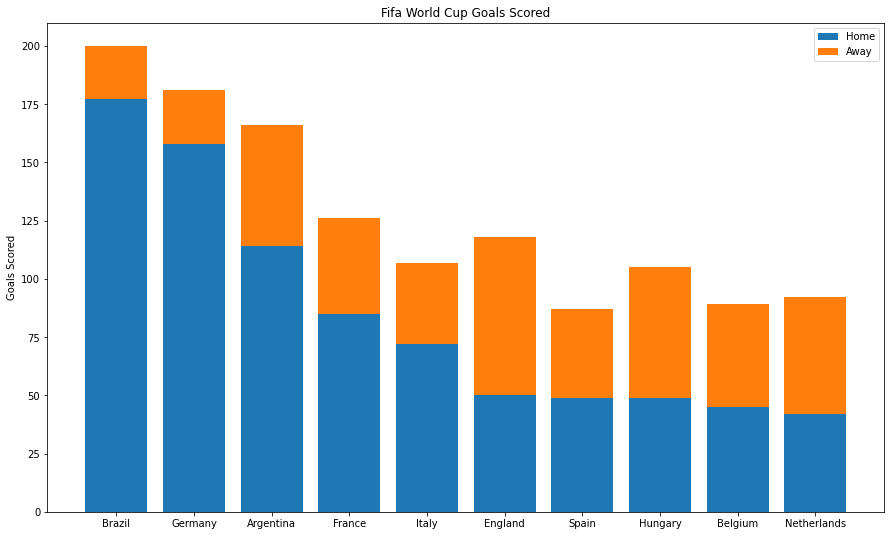

In [79]:
fig, ax = plt.subplots(figsize=(15,9))
p1 = plt.bar(x1,y1)
p2 = plt.bar(x1,y2, bottom=y1)
plt.ylabel('Goals Scored')
plt.title('Fifa World Cup Goals Scored')
plt.legend((p1[0], p2[0]), ('Home', 'Away'))
plt.show()


## Task
What is the number of matches played in each tournament throughout history?

In [88]:
tourneys = football.groupby('tournament').count().sort_values(by='city', ascending=False)
tourneys.head()

,date,home_team,away_team,home_score,away_score,city,country,neutral
tournament,,,,,,,,
Friendly,17029,17029,17029,17029,17029,17029,17029,17029
FIFA World Cup qualification,7236,7236,7236,7236,7236,7236,7236,7236
UEFA Euro qualification,2582,2582,2582,2582,2582,2582,2582,2582
African Cup of Nations qualification,1672,1672,1672,1672,1672,1672,1672,1672
FIFA World Cup,900,900,900,900,900,900,900,900


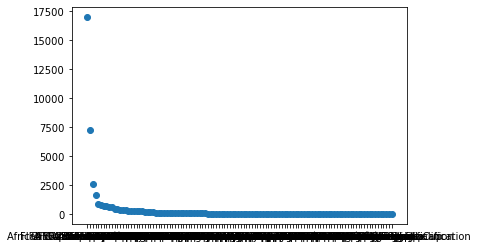

In [89]:
xs = tourneys.index.values
ys=tourneys['date'].values
plt.scatter(xs, ys)
plt.show()

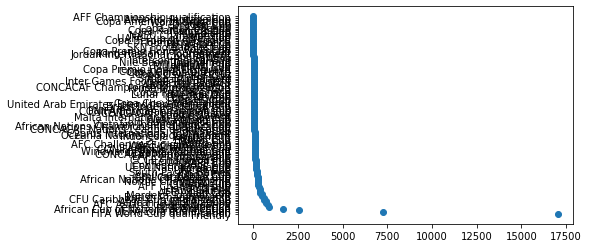

In [91]:
xs = tourneys.index.values
ys=tourneys['date'].values
plt.scatter(ys, xs)
plt.show()

## Task 
Show the trend in number of matches per year.

In [98]:
#df['year'] = pd.DatetimeIndex(df['ArrivalDate']).year
football['year'] = pd.DatetimeIndex(football['date']).year
f_year=football.groupby('year').count()
f_year.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
year,,,,,,,,,
1872,1,1,1,1,1,1,1,1,1
1873,1,1,1,1,1,1,1,1,1
1874,1,1,1,1,1,1,1,1,1
1875,1,1,1,1,1,1,1,1,1
1876,2,2,2,2,2,2,2,2,2


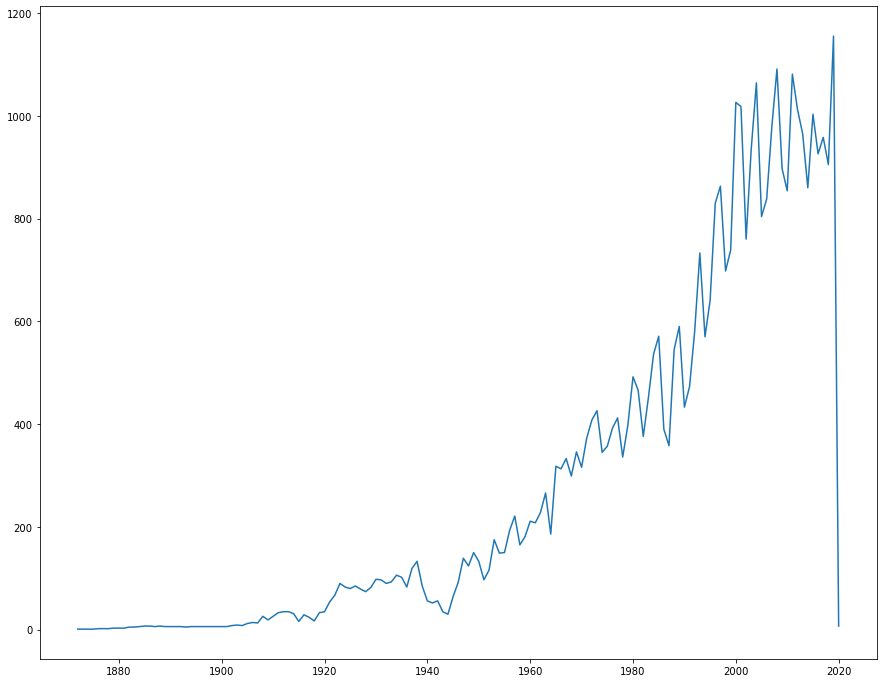

In [100]:
fig, ax = plt.subplots(figsize=(15,12))
year=f_year.index.values
matches=f_year['date'].values
plt.plot(year,matches)

## Task
Which teams are the most successful ones? (winning percentage)

In [103]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [109]:
football['winner'] = ''
football['loser'] = ''
for i in range(len(football.index)):
    if football['home_score'].iloc[i] > football['away_score'].iloc[i]:
        football['winner'].iloc[i] = football['home_team'].iloc[i]
        football['loser'].iloc[i] = football['away_team'].iloc[i]
    elif football['home_score'].iloc[i] < football['away_score'].iloc[i]:
        football['winner'].iloc[i] = football['away_team'].iloc[i]
        football['loser'].iloc[i] = football['home_team'].iloc[i]
    else:
        football['winner'].iloc[i] = 'draw'
        football['loser'].iloc[i] = 'draw'


G:\Programming\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,England


In [200]:
football_mor = football
winners = football_mor[['date','winner']].groupby('winner').count().reset_index().rename(columns={'winner':'team', 'date':'Wins'})
losers = football_mor[['date', 'loser']].groupby('loser').count().reset_index().rename(columns={'loser':'team', 'date':'Losses'})
home_games= football_mor[['home_team','date']].groupby('home_team').count().reset_index().rename(columns={'home_team':'team', 'date':'home_games'})
away_games=football_mor[['away_team','date']].groupby('away_team').count().reset_index().rename(columns={'away_team':'team', 'date':'away_games'})
total_games = home_games.merge(away_games, how='outer',on='team').fillna(0)
total_games['Games Played']= total_games['home_games'] + total_games['away_games']
total_games = total_games.merge(winners,how='outer', on='team')
total_games = total_games.merge(losers,how='outer',on='team')
total_games['Winrate'] = total_games['Wins'] / total_games['Games Played']
total_games['Lossrate'] = total_games['Losses'] / total_games['Games Played']
total_games.sort_values(by='Winrate', ascending=False)

,team,home_games,away_games,Games Played,Wins,Losses,Winrate,Lossrate
309,Surrey,0.0,1.0,1.0,1.0,NaN,1.000000,NaN
308,Asturias,0.0,1.0,1.0,1.0,NaN,1.000000,NaN
46,Canary Islands,4.0,0.0,4.0,3.0,1.0,0.750000,0.250000
302,Yorkshire,5.0,2.0,7.0,5.0,1.0,0.714286,0.142857
201,Padania,28.0,15.0,43.0,29.0,6.0,0.674419,0.139535
...,...,...,...,...,...,...,...,...
232,Saint Pierre and Miquelon,1.0,6.0,7.0,NaN,7.0,NaN,1.000000
236,Sark,1.0,3.0,4.0,NaN,4.0,NaN,1.000000
271,Tibet,4.0,9.0,13.0,NaN,12.0,NaN,0.923077
290,Vatican City,2.0,4.0,6.0,NaN,4.0,NaN,0.666667


In [208]:
y1 = total_games.sort_values(by='Winrate', ascending=False).head(10)
y2 = total_games.sort_values(by='Lossrate', ascending=False).head(10)
x1 = total_games.sort_values(by='Winrate', ascending=False).head(10)
x2 = total_games.sort_values(by='Lossrate', ascending=False).head(10)
y11 = y1['Winrate'].values
y22 = y2['Lossrate'].values
x11 = x1['team'].values
x22 = x2['team'].values




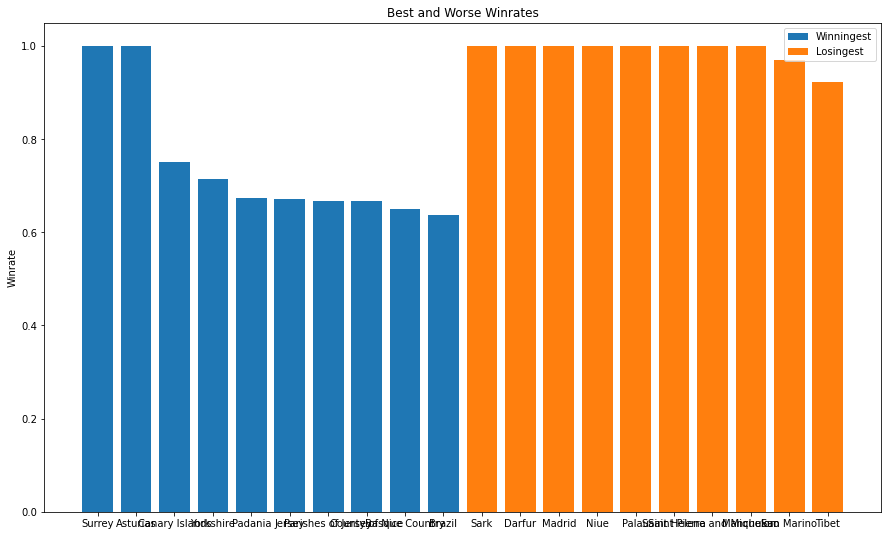

In [209]:
fig, ax = plt.subplots(figsize=(15,9))
p1 = plt.bar(x11,y11)
p2 = plt.bar(x22,y22)
plt.ylabel('Winrate')
plt.title('Best and Worse Winrates')
plt.legend((p1[0], p2[0]), ('Winningest', 'Losingest'))
plt.show()


## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [210]:
football['month'] = pd.DatetimeIndex(football['date']).month

In [261]:
months = football.groupby('month').count().reset_index()
short_data = football.head(100)
short_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner,loser,Win%,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,draw,draw,NaN,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England,Scotland,NaN,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,England,NaN,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,draw,draw,NaN,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,England,NaN,3


<AxesSubplot:xlabel='month', ylabel='Probability'>

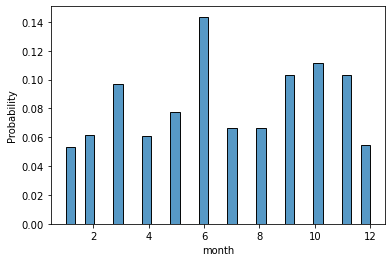

In [272]:
sb.histplot(x = 'month', data = football, stat='probability')


<AxesSubplot:xlabel='month', ylabel='Density'>

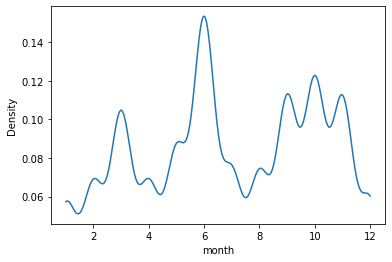

In [282]:
sb.kdeplot(x = 'month', data = football, clip=(1.0,12.0))


## Task
Which teams played against each other the most?

In [6]:
# Isolate Matches of interest.
fifa = football.loc[football['tournament'].str.startswith('FIFA')]
# Make list of best home teams and away teams.
home_teams = fifa.groupby('home_team').count().sort_values(by='date', ascending=False).head(15)
away_teams = fifa.groupby('away_team').count().sort_values(by='date', ascending=False).head(15)
# Combine lists into one.
teams = home_teams.index.append(away_teams.index)
# Use set to get unique teams.
top_teams=set(teams.to_list())
# Select all columns from the fifa data set where the teams are both present. 
fifa_pairings = fifa.loc[(fifa['home_team'].isin(top_teams))&(fifa['away_team'].isin(top_teams))]
fifa_pairings.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
1309,1930-07-16,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True
1311,1930-07-17,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True


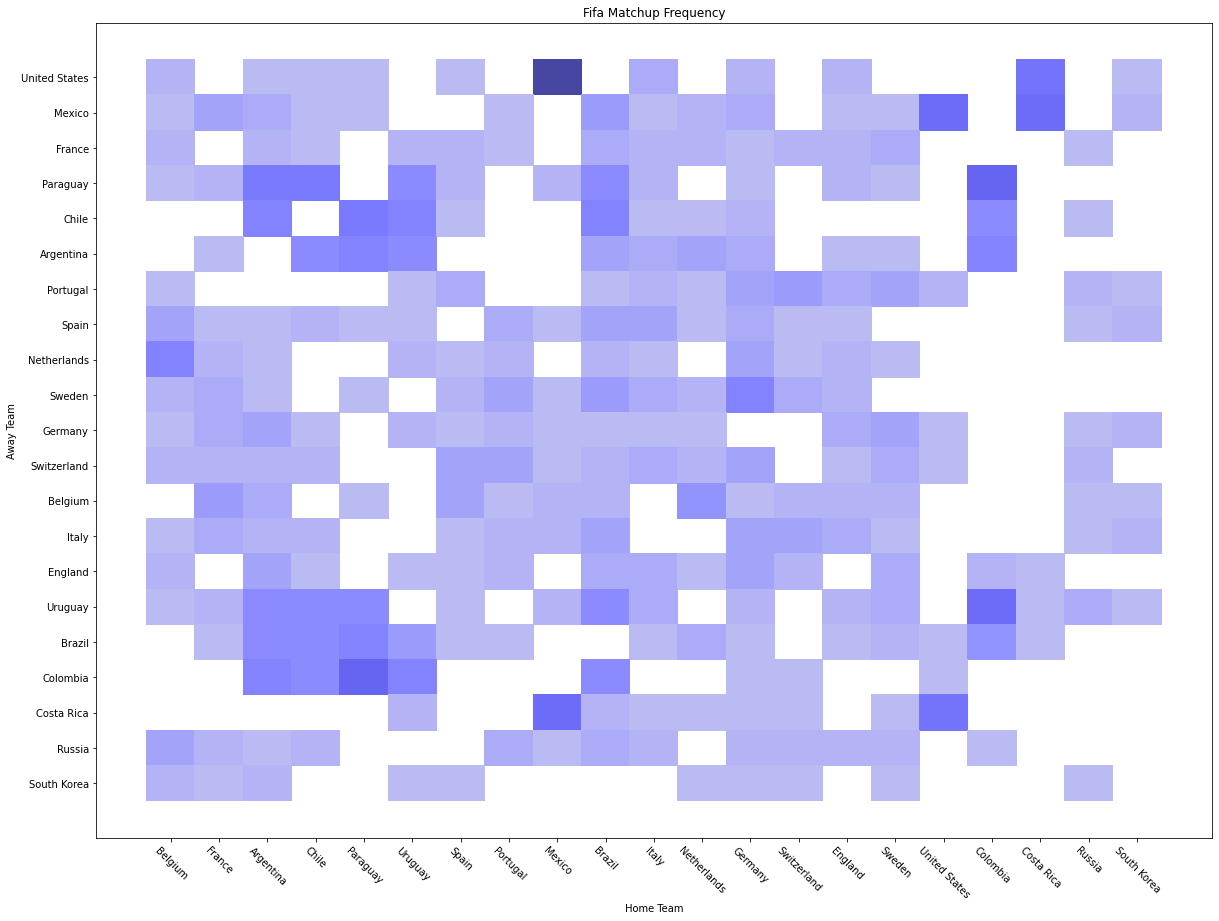

In [339]:
fig, ax = plt.subplots(figsize=(20,15))
plt.ylabel('Away Team')
plt.xlabel('Home Team')
plt.title('Fifa Matchup Frequency')
plt.xticks(rotation=-45)
test = sb.histplot(x=('home_team'), y=('away_team'), data=fifa_pairings, color = 'blue')
Fifa_MU = test.get_figure()
Fifa_MU.savefig('Fifa_MU.png')


<AxesSubplot:xlabel='home_team', ylabel='away_team'>

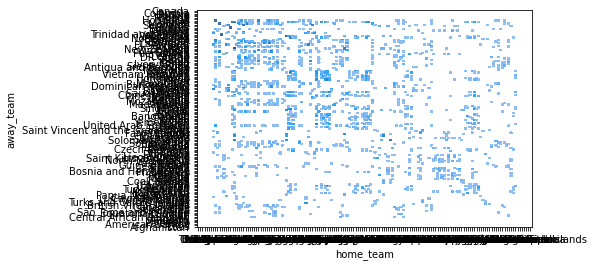

In [291]:
sb.histplot(x='home_team', y='away_team', data=fifa, binrange=(60,200), element = 'poly')

In [254]:
sb.heatmap(data=)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.